In [6]:
# 在notebook开头添加以下配置代码
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
from IPython import get_ipython

def setup_chinese_display():
    system = platform.system()
    
    if system == 'Darwin':  # macOS
        plt.rcParams['font.family'] = ['Arial Unicode MS']
        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang HK', 'STHeiti']
        plt.rcParams['figure.dpi'] = 100
        plt.rcParams['savefig.dpi'] = 100
    
    plt.rcParams['axes.unicode_minus'] = False
    
    # 设置 inline 模式的字体
    if get_ipython() is not None:
        get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")

# 调用配置函数
setup_chinese_display()

# 验证字体是否正确加载
def check_fonts():
    fonts = [f.name for f in fm.fontManager.ttflist]
    chinese_fonts = [f for f in fonts if any(s in f for s in ['Chinese', 'CJK', '黑体', '宋体', '楷体', 'PingFang', 'Heiti'])]
    print("可用的中文字体：")
    for font in chinese_fonts:
        print(font)

check_fonts()


可用的中文字体：
.CJK Symbols Fallback HK
PingFang HK
Heiti TC
STHeiti
Heiti TC
STHeiti



=== 生成卡片详情 ===
生成 R 卡片: 36张 (基础需求: 27.0张)
生成 SR 卡片: 13张 (基础需求: 10.0张)
生成 SSR 卡片: 13张 (基础需求: 10.0张)
生成 AR 卡片: 10张 (基础需求: 2.0张)
生成 BP 卡片: 10张 (基础需求: 1.0张)

=== 实际生成卡片数量 ===
R卡: 36张
SR卡: 13张
SSR卡: 13张
AR卡: 10张
BP卡: 10张

=== 计划生成的卡包数量 ===
A类型卡包: 7个
B类型卡包: 2个
C类型卡包: 1个

尝试生成 A 类型卡包 7 个
成功创建 A 类型卡包
成功创建 A 类型卡包
成功创建 A 类型卡包
成功创建 A 类型卡包
成功创建 A 类型卡包
成功创建 A 类型卡包
成功创建 A 类型卡包

当前剩余卡片:
R卡剩余: 15
SR卡剩余: 6
SSR卡剩余: 6
AR卡剩余: 10
BP卡剩余: 10

尝试生成 B 类型卡包 2 个
成功创建 B 类型卡包
成功创建 B 类型卡包

当前剩余卡片:
R卡剩余: 11
SR卡剩余: 4
SSR卡剩余: 4
AR卡剩余: 8
BP卡剩余: 10

尝试生成 C 类型卡包 1 个
成功创建 C 类型卡包

当前剩余卡片:
R卡剩余: 9
SR卡剩余: 3
SSR卡剩余: 3
AR卡剩余: 8
BP卡剩余: 9
抽取的卡包：
卡包ID: 1
卡包类型: A
卡片:
- R
- R
- R
- SR
- SSR

卡包统计：


,数量,百分比
总数,10,100.0
已抽取,1,10.0
剩余,9,90.0


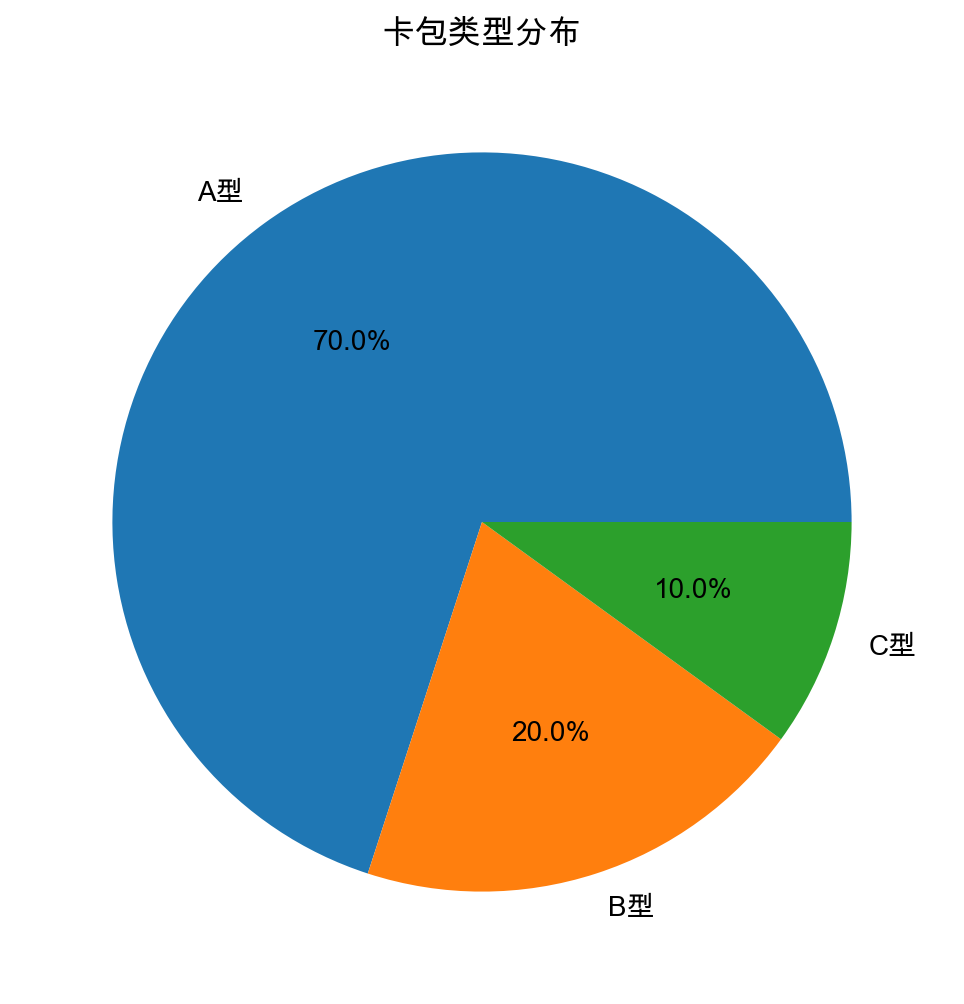

In [7]:
# 添加项目根目录到系统路径
import os
import sys
notebook_path = os.path.abspath('')
project_root = os.path.dirname(notebook_path)  # 获取上一级目录
if project_root not in sys.path:
    sys.path.append(project_root)


# 导入必要的模块
from card_draw import CardDrawSystem
from card_pool import CardPool
from config import PackConfig
import pandas as pd
import matplotlib.pyplot as plt


# 创建抽卡系统
system = CardDrawSystem()

# 测试抽卡
pack = system.draw_pack()
print("抽取的卡包：")
print(f"卡包ID: {pack['pack_id']}")
print(f"卡包类型: {pack['pack_type']}")
print("卡片:")
for card in pack['cards']:
    print(f"- {card.rarity}")

# 生成统计报告
stats = system.generate_report()

# 使用pandas展示数据
df = pd.DataFrame({
    '数量': [stats['total'], stats['drawn'], stats['remaining']],
    '百分比': [100, 
              stats['drawn']/stats['total']*100,
              stats['remaining']/stats['total']*100]
}, index=['总数', '已抽取', '剩余'])

print("\n卡包统计：")
display(df)

# 绘制饼图
plt.figure(figsize=(10,6))
plt.pie([stats['total_A'], stats['total_B'], stats['total_C']], 
        labels=['A型', 'B型', 'C型'],
        autopct='%1.1f%%')
plt.title('卡包类型分布')
plt.show()
